In [54]:
import numpy as np, pandas as pd, time, os, itertools, subprocess, scipy as sp, re
import seaborn; seaborn.set_style('whitegrid')
import matplotlib.pyplot as plt, importlib
import scipy.sparse
import utils, diffmap as dm#, scanpy as sc
import sklearn.metrics

data_pfx = '/oak/stanford/groups/akundaje/abalsubr/search_ui/'
data_pfx = '/Users/akshay/github/encode-ui-sandbox/data/'

In [3]:
importlib.reload(utils)
experiments_core = pd.DataFrame.from_csv("data/ENCODE2018Core.tsv", index_col=None, sep='\t')
experiments_sparse = pd.DataFrame.from_csv("data/ENCODE2018Sparse.tsv", index_col=None, sep='\t')
experiments_sparse = experiments_sparse.rename(columns={"Accession_x": "Accession"})
experiments = pd.concat((experiments_core, experiments_sparse))

/Users/akshay/anaconda3/envs/encode_ui/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/Users/akshay/anaconda3/envs/encode_ui/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Experimental embeddings

In [56]:
itime = time.time()
eemb = np.load('data/experiment_embedding.npz')['arr_0']
print(time.time() - itime)
sparse_adj = utils.make_nn_graph(eemb, k=10)
print(time.time() - itime)

FileNotFoundError: [Errno 2] No such file or directory: 'data/experiment_embedding.npz'

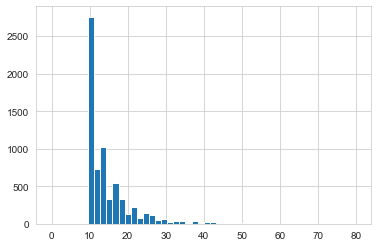

In [57]:
#scipy.sparse.save_npz(data_pfx + 'encode3_6870_10nn.npz', sparse_adj)
sparse_adj = scipy.sparse.load_npz(data_pfx + 'encode3_6870_10nn.npz')
plt.hist(np.ravel(sparse_adj.sum(axis=0)), bins=50, range=(0,80))
plt.show()

In [45]:
from umap import UMAP
itime = time.time()
X_umap = UMAP(200, random_state=111).fit_transform(eemb)
print(time.time() - itime)

/users/abalsubr/anaconda2/envs/scs3/lib/python3.6/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda2/envs/scs3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


66.47995853424072


In [49]:
experiments['umap_raw_X'] = X_umap[:,0]
experiments['umap_raw_Y'] = X_umap[:,1]

In [52]:
itime = time.time()
X_diffmap_100 = dm.diffmap_proj(sparse_adj, n_dims=100)
print(time.time() - itime)

101 dimensions contain about 0.95 fraction of the variance in the first 2000 dimensions (Diffusion time = 19.126298161980007)
310.04082918167114


In [53]:
itime = time.time()
X_umap_2 = UMAP(200, random_state=111).fit_transform(X_diffmap_100)
print(time.time() - itime)
experiments['umap_graph_X'] = X_umap_2[:,0]
experiments['umap_graph_Y'] = X_umap_2[:,1]

/users/abalsubr/anaconda2/envs/scs3/lib/python3.6/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda2/envs/scs3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


54.893067359924316


In [48]:
experiments.to_csv('data/experiments.csv', sep='\t', index=None)

In [4]:
experiments = pd.DataFrame.from_csv("data/experiments.csv", index_col=None, sep='\t')

/Users/akshay/anaconda3/envs/encode_ui/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [19]:
assaynames = [x.split('_signal')[0] for x in experiments['Assay'] if '_signal'  in x]
newnames = []
for i in range(len(assaynames)):
    a = assaynames[i]
    newnames.append("{}_{}".format(a, experiments['Biosample'][i]))
experiments['Experiment_name'] = newnames

In [41]:
[x for x in zip(*np.unique(experiments['Biosample'], return_counts=True))]

[('22Rv1', 5),
 ('8988T', 1),
 ('A172', 5),
 ('A375', 6),
 ('A549', 91),
 ('A673', 9),
 ('ACC112', 7),
 ('ACHN', 1),
 ('AG04449', 3),
 ('AG04450', 14),
 ('AG08395', 1),
 ('AG08396', 1),
 ('AG09309', 3),
 ('AG09319', 3),
 ('AG10803', 3),
 ('AG20443', 1),
 ("Ammon's horn", 1),
 ('B cell', 38),
 ('BE2C', 3),
 ('BJ', 13),
 ('C4-2B', 3),
 ('CD14-positive monocyte', 30),
 ('CD1c-positive myeloid dendritic cell', 1),
 ('CD4-positive, CD25-positive, alpha-beta regulatory T cell', 6),
 ('CD4-positive, alpha-beta T cell', 21),
 ('CD4-positive, alpha-beta memory T cell', 9),
 ('CD8-positive, alpha-beta T cell', 23),
 ('CD8-positive, alpha-beta memory T cell', 6),
 ('CMK', 1),
 ('COLO829', 1),
 ('CWRU1', 1),
 ('Caco-2', 5),
 ('Caki2', 3),
 ('DND-41', 12),
 ('DOHH2', 14),
 ('Daoy', 5),
 ('EH', 1),
 ('EL', 1),
 ('ELF-1', 1),
 ('ELR', 1),
 ('ES-I3', 4),
 ('G401', 3),
 ('GM03348', 2),
 ('GM04503', 1),
 ('GM04504', 1),
 ('GM06990', 5),
 ('GM08714', 2),
 ('GM10248', 2),
 ('GM10266', 2),
 ('GM12801', 1),

In [46]:
experiments['Dummy'] = 0

In [47]:
experiments

,Biosample Index,Biosample,Biosample summary,Assay,Accession,Download URL,umap_raw_X,umap_raw_Y,umap_graph_X,umap_graph_Y,Experiment_name,Dummy
0,J000,KMS-11,KMS-11,ChIP-seq_H3K79me2_signal_p-value,ENCFF879WIV,/files/ENCFF879WIV/@@download/ENCFF879WIV.bigWig,-3.615676,-24.384886,2.482154,-1.983349,ChIP-seq_H3K79me2_KMS-11,0
1,J000,KMS-11,KMS-11,ChIP-seq_H2AFZ_signal_p-value,ENCFF846LPN,/files/ENCFF846LPN/@@download/ENCFF846LPN.bigWig,-5.296398,-23.262926,3.161367,-3.905271,ChIP-seq_H2AFZ_KMS-11,0
2,J000,KMS-11,KMS-11,ChIP-seq_H3K9me2_signal_p-value,ENCFF251LTR,/files/ENCFF251LTR/@@download/ENCFF251LTR.bigWig,-1.641131,-25.049938,1.816649,-12.636643,ChIP-seq_H3K9me2_KMS-11,0
3,J000,KMS-11,KMS-11,ChIP-seq_H3K9ac_signal_p-value,ENCFF270UYP,/files/ENCFF270UYP/@@download/ENCFF270UYP.bigWig,-2.667513,-25.398607,1.983152,-6.587357,ChIP-seq_H3K9ac_KMS-11,0
4,J000,KMS-11,KMS-11,ChIP-seq_H3K4me2_signal_p-value,ENCFF651XGU,/files/ENCFF651XGU/@@download/ENCFF651XGU.bigWig,-2.700948,-25.395985,2.065542,-6.478400,ChIP-seq_H3K4me2_KMS-11,0
5,J000,KMS-11,KMS-11,ChIP-seq_H4K20me1_signal_p-value,ENCFF323WKX,/files/ENCFF323WKX/@@download/ENCFF323WKX.bigWig,-3.026686,-25.674616,0.033474,-3.080134,ChIP-seq_H4K20me1_KMS-11,0
6,J000,KMS-11,KMS-11,ChIP-seq_H3K4me1_signal_p-value,ENCFF430GAD,/files/ENCFF430GAD/@@download/ENCFF430GAD.bigWig,-2.649350,-25.390863,2.116910,-6.653285,ChIP-seq_H3K4me1_KMS-11,0
7,J000,KMS-11,KMS-11,ChIP-seq_H3K36me3_signal_p-value,ENCFF695LIV,/files/ENCFF695LIV/@@download/ENCFF695LIV.bigWig,-5.527977,-23.570675,6.249046,-1.739097,ChIP-seq_H3K36me3_KMS-11,0
8,J000,KMS-11,KMS-11,ChIP-seq_H3K27me3_signal_p-value,ENCFF952TLY,/files/ENCFF952TLY/@@download/ENCFF952TLY.bigWig,-1.547282,-25.965563,6.000283,17.020662,ChIP-seq_H3K27me3_KMS-11,0
9,J000,KMS-11,KMS-11,ChIP-seq_CTCF_signal_p-value,ENCFF111QNV,/files/ENCFF111QNV/@@download/ENCFF111QNV.bigWig,-5.626563,-21.900236,-2.654870,5.617277,ChIP-seq_CTCF_KMS-11,0
